<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/reviews_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
reviews =pd.read_csv("/content/reviews_sentiment.csv", sep=';')
reviews

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


In [10]:
print("Dimensiones del dataset:", reviews.shape)


Dimensiones del dataset: (257, 7)


In [11]:
reviews["textSentiment"].fillna("neutral", inplace=True)


le = preprocessing.LabelEncoder()
reviews["textSentiment"] = le.fit_transform(reviews["textSentiment"])


X = reviews[["textSentiment"]]
y = reviews["Star Rating"]


scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

/tmp/ipython-input-168182080.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews["textSentiment"].fillna("neutral", inplace=True)


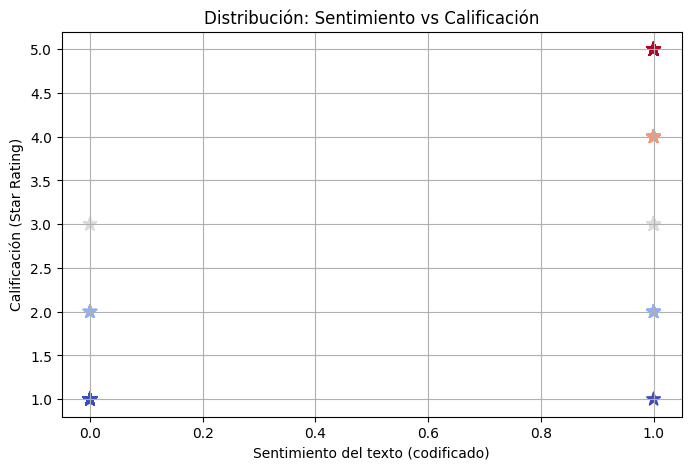

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(reviews["textSentiment"], reviews["Star Rating"],
            c=reviews["Star Rating"], cmap='coolwarm', s=100, marker='*')
plt.title("Distribución: Sentimiento vs Calificación")
plt.xlabel("Sentimiento del texto (codificado)")
plt.ylabel("Calificación (Star Rating)")
plt.grid(True)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [16]:
metricas = ['manhattan', 'minkowski', 'hamming']
resultados = {}

for m in metricas:
    modelo = KNeighborsClassifier(n_neighbors=3, metric=m)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Guardar resultados
    resultados[m] = {
        'confusion': confusion_matrix(y_test, y_pred),
        'reporte': classification_report(y_test, y_pred, output_dict=True)
    }

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [17]:
for m in metricas:
    print(f"\n🔸 MÉTRICA: {m.upper()}")
    print("Matriz de confusión:\n", resultados[m]['confusion'])
    print("Reporte de clasificación:")
    print(classification_report(y_test,
                                KNeighborsClassifier(n_neighbors=3, metric=m)
                                .fit(X_train, y_train)
                                .predict(X_test)))


🔸 MÉTRICA: MANHATTAN
Matriz de confusión:
 [[10  0  0  0  1]
 [ 2  0  0  0  4]
 [ 2  0  0  0 22]
 [ 0  0  0  0 11]
 [ 0  0  0  0 26]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        11
           5       0.41      1.00      0.58        26

    accuracy                           0.46        78
   macro avg       0.22      0.38      0.28        78
weighted avg       0.24      0.46      0.31        78


🔸 MÉTRICA: MINKOWSKI
Matriz de confusión:
 [[10  0  0  0  1]
 [ 2  0  0  0  4]
 [ 2  0  0  0 22]
 [ 0  0  0  0 11]
 [ 0  0  0  0 26]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.00      0.00      0.00         6
           3       0.00   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [18]:
mejor_metrica = None
mejor_f1 = 0

for m in metricas:
    f1_promedio = resultados[m]['reporte']['weighted avg']['f1-score']
    print(f"Métrica: {m} -> F1 promedio: {f1_promedio:.3f}")
    if f1_promedio > mejor_f1:
        mejor_f1 = f1_promedio
        mejor_metrica = m

print(f"\n✅ El mejor modelo usa la métrica: {mejor_metrica.upper()} con F1 promedio = {mejor_f1:.3f}")

Métrica: manhattan -> F1 promedio: 0.305
Métrica: minkowski -> F1 promedio: 0.305
Métrica: hamming -> F1 promedio: 0.305

✅ El mejor modelo usa la métrica: MANHATTAN con F1 promedio = 0.305


In [20]:
valores_k = [1, 3, 5, 7, int(np.sqrt(len(reviews)))]
precisiones = {}

for k in valores_k:
    modelo = KNeighborsClassifier(n_neighbors=k, metric=mejor_metrica)
    modelo.fit(X_train, y_train)
    acc = modelo.score(X_test, y_test)
    precisiones[k] = acc
    print(f"k = {k} → Precisión: {acc:.3f}")

k = 1 → Precisión: 0.462
k = 3 → Precisión: 0.462
k = 5 → Precisión: 0.462
k = 7 → Precisión: 0.462
k = 16 → Precisión: 0.462


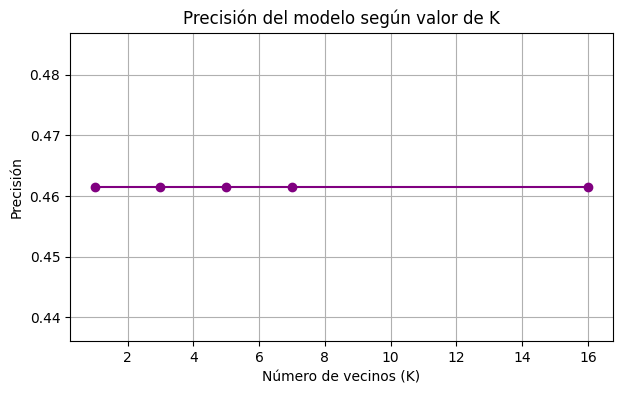

In [21]:
plt.figure(figsize=(7,4))
plt.plot(valores_k, list(precisiones.values()), marker='o', color='purple')
plt.title("Precisión del modelo según valor de K")
plt.xlabel("Número de vecinos (K)")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()

In [23]:
nuevo_sentimiento = "positive"
sent_cod = le.transform([nuevo_sentimiento])
sent_cod_esc = scaler.transform(np.array(sent_cod).reshape(-1, 1))

clasificador_final = KNeighborsClassifier(n_neighbors=3, metric=mejor_metrica)
clasificador_final.fit(X_scaled, y)

print("\n🔹 Predicción para una reseña con sentimiento:", nuevo_sentimiento)
print("Clase predicha (Star Rating):", clasificador_final.predict(sent_cod_esc)[0])
print("Probabilidad por clase:", clasificador_final.predict_proba(sent_cod_esc))


🔹 Predicción para una reseña con sentimiento: positive
Clase predicha (Star Rating): 2
Probabilidad por clase: [[0.33333333 0.66666667 0.         0.         0.        ]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
